<a href="https://colab.research.google.com/github/Frexander/Final_Portfolio/blob/master/Q_learning_vs_SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing necesarry packages
!pip install gymnasium
!pip install numpy
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 15.5 MB/s eta 0:00:00


In [ ]:
#Importing necesarry libraries
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
#Create environment and then define state- and action-space followedby creating Q-table with zeros as a starting point

env = gym.make("Taxi-v3")

state_space = env.observation_space.n
action_space = env.action_space.n
Q_table = np.zeros([state_space, action_space])

In [ ]:
# Defining training parameters / hyperparameters
# ALTERNATIVE 1 (low/medium learning rate, low grade of exploration), trying to balance exploration and exploitation based on suggested settings from the litterature

episodes = 1000
max_steps = 100
learning_rate = 0.3
discount_rate = 0.95
epsilon = 0.1

In [ ]:
# Defining training parameters / hyperparameters
# ALTERNATIVE 2 (low/medium learning rate, higher grade of exploration), trying to improve total reward by increasing exploration

episodes = 1000
max_steps = 100
learning_rate = 0.3
discount_rate = 0.95
epsilon = 0.3

In [ ]:
# Defining training parameters / hyperparameters
# ALTERNATIVE 3 (low learning rate, high grade of exploration), expected to yield a chaotic result and therefore non-converging

episodes = 1000
max_steps = 100
learning_rate = 0.1
discount_rate = 0.95
epsilon = 0.6

In [ ]:
# Defining training parameters / hyperparameters
# ALTERNATIVE 4 (high learning rate, low grade of exploration), expected to yield "less moving around" and not be the best parameter setting

episodes = 1000
max_steps = 100
learning_rate = 0.6
discount_rate = 0.95
epsilon = 0.1

In [ ]:
# Defining training parameters / hyperparameters
# ALTERNATIVE 5 (lower learning rate, low/medium exploration, lower discount rate) expected to give similar results as Alternative 1.

episodes = 1000
max_steps = 100
learning_rate = 0.4
discount_rate = 0.8
epsilon = 0.2

In [ ]:
# Storing rewards for visualization later and average reward of each run for every 25th episode

training_rewards = []
average_rewards = []


In [ ]:
# Q-LEARNING ALGORITHM
# Training runs, i.e. training the agent by using the above training parameters
# Training parameter setting is chosen by activation the alternative that is to be explored
# In these runs, epsilon is constant

for episode in range(episodes):
  state, info = env.reset()       #learned the hard way that the code will not run without resetting the environment...
  total_rewards = 0

  for step in range(max_steps):
    if np.random.uniform(0,1) > epsilon:
      action = np.argmax(Q_table[state,:])  # Choose action with highest Q-value (exploit)
    else:
      action = env.action_space.sample()    # Choose random action (explore)

    new_state, reward, terminated, truncated, info = env.step(action) # Performa action and observe resulting state

    # Update Q-table
    Q_table[state, action] = Q_table[state, action] + learning_rate * (reward + discount_rate * np.max(Q_table[new_state, :]) - Q_table[state, action])

    state = new_state       # Update state
    total_rewards += reward # Update total reward

    if terminated or truncated:
      break

  training_rewards.append(total_rewards)
  average_rewards.append(np.mean(training_rewards[-25:]))

  if episode % 100 == 0:
    print(f"Episode number: {episode}")
    print(f"Training reward: {total_rewards}")
    print(f"Exploration rate (epsilon value): {epsilon}")

Episode number: 0
Training reward: -271
Exploration rate (epsilon value): 0.2
Episode number: 100
Training reward: -118
Exploration rate (epsilon value): 0.2
Episode number: 200
Training reward: -86
Exploration rate (epsilon value): 0.2
Episode number: 300
Training reward: -154
Exploration rate (epsilon value): 0.2
Episode number: 400
Training reward: -26
Exploration rate (epsilon value): 0.2
Episode number: 500
Training reward: -6
Exploration rate (epsilon value): 0.2
Episode number: 600
Training reward: -26
Exploration rate (epsilon value): 0.2
Episode number: 700
Training reward: 10
Exploration rate (epsilon value): 0.2
Episode number: 800
Training reward: -10
Exploration rate (epsilon value): 0.2
Episode number: 900
Training reward: 10
Exploration rate (epsilon value): 0.2


In [ ]:
# SARSA ALGORITHM

# Training runs, i.e. training the agent by using the above training parameters
# Training parameter setting is chosen by activation the alternative that is to be explored
# In these runs, epsilon is constant

for episode in range(episodes):
  state, info = env.reset()       #learned the hard way that the code will not run without resetting the environment...
  total_rewards = 0

  # Choose initial action
  if np.random.uniform(0,1) > epsilon:
      action = np.argmax(Q_table[state,:])  # Choose action with highest Q-value (exploit)
  else:
      action = env.action_space.sample()    # Choose random action (explore)

  for step in range(max_steps):
    # Perform action and observe the result
    new_state, reward, terminated, truncated, info = env.step(action)

    # Select next action

    if np.random.uniform(0,1) > epsilon:
      new_action = np.argmax(Q_table[new_state,:])  # Choose action with highest Q-value (exploit)
    else:
      action = env.action_space.sample()    # Choose random action (explore)


    # Update Q-table
    Q_table[state, action] = Q_table[state, action] + learning_rate * (reward + discount_rate * Q_table[new_state, new_action]) - Q_table[state, action]

    state = new_state       # Update state
    action = new_action     # Update action
    total_rewards += reward # Update total reward

    if terminated or truncated:
      break

  training_rewards.append(total_rewards)
  average_rewards.append(np.mean(training_rewards[-25:]))

  if episode % 100 == 0:
    print(f"Episode number: {episode}")
    print(f"Training reward: {total_rewards}")
    print(f"Exploration rate (epsilon value): {epsilon}")

Episode number: 0
Training reward: -109
Exploration rate (epsilon value): 0.2
Episode number: 100
Training reward: 2
Exploration rate (epsilon value): 0.2
Episode number: 200
Training reward: -136
Exploration rate (epsilon value): 0.2
Episode number: 300
Training reward: -23
Exploration rate (epsilon value): 0.2
Episode number: 400
Training reward: -145
Exploration rate (epsilon value): 0.2
Episode number: 500
Training reward: -199
Exploration rate (epsilon value): 0.2
Episode number: 600
Training reward: 3
Exploration rate (epsilon value): 0.2
Episode number: 700
Training reward: -171
Exploration rate (epsilon value): 0.2
Episode number: 800
Training reward: -25
Exploration rate (epsilon value): 0.2
Episode number: 900
Training reward: -100
Exploration rate (epsilon value): 0.2


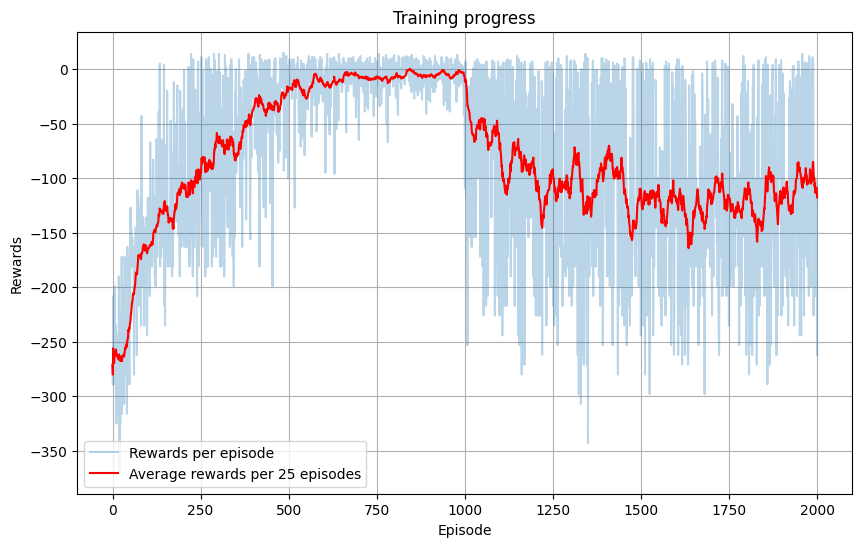

In [ ]:
# Vizualising training results
plt.figure(figsize=(10, 6))
plt.plot(training_rewards, label = 'Rewards per episode', alpha = 0.3)
plt.plot(average_rewards, label = 'Average rewards per 25 episodes', color = 'red')
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.title('Training progress')
plt.legend()
plt.grid(True)
plt.show()

# Visualising trained agent:

def vizualise_solution(env, Q_table):
  state, info = env.reset()
  total_reward = 0

  for step in range(max_steps):
    env.render()
    time.sleep(1)

    action = np.argmax(Q_table[state,:])

    state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    if terminated or truncated:
      env.render()
      time.sleep(1)
      break

  print(f"Total reward is: {total_reward}")